In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import numpy as np

In [85]:
# create data

nPerCluster = 100
blur = 1

# center (origin) of the data on x-y plane
A = [1, 1]
B = [5, 1]
C = [3, 5]

# generate data
a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster)*blur]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster)*blur]
c = [C[0]+np.random.randn(nPerCluster)*blur, C[1]+np.random.randn(nPerCluster)*blur]

# true labels
labels_np = np.concatenate((np.zeros((nPerCluster)), np.ones((nPerCluster)), np.ones((nPerCluster))+1))

# concatenate into a matrix
data_np = np.hstack((a, b, c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()
labels


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

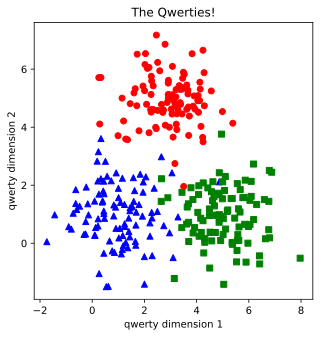

In [56]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1],'b^')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1],'gs')
plt.plot(data[np.where(labels==2)[0], 0], data[np.where(labels==2)[0], 1],'ro')
plt.title('The Qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [57]:
# Create the model

ANNModel = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,3)
)

lossFunction = nn.CrossEntropyLoss() # SoftMax already included in the loss function

optimizer = torch.optim.SGD(ANNModel.parameters(), lr=0.01)

In [86]:
# train the model

epochs = 10000

losses = torch.zeros(epochs)
ongoingAcc = []

for epoch in range(epochs):
    yHat = ANNModel(data)

    loss = lossFunction(yHat, labels)
    losses[epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy at every epoch
    matches = torch.argmax(yHat, axis=1) == labels # boolean (True/False)
    matchesNumerix = matches.float() # numbers (1/0)
    accuracyPercentage = torch.mean(matchesNumerix)*100 # averaging will give how many are correct
    ongoingAcc.append(accuracyPercentage)


In [97]:
# final forward pass
predictions = ANNModel(data)
predictedLabels = torch.argmax(predictions, axis=1)
totalAcc = torch.mean((predictedLabels==labels).float())*100
print(totalAcc)


tensor(98.)


tensor([[ 8.3633e+00, -1.7530e+00, -3.9179e+00],
        [ 1.6722e+00,  8.8679e-01, -1.0986e+00],
        [ 6.5668e+00, -1.7910e+00, -2.2876e+00],
        [ 3.6914e+00, -1.4237e+00, -3.1773e-01],
        [ 4.5263e+00,  4.5291e-01, -3.6116e+00],
        [ 4.7337e+00, -1.6279e+00, -9.3570e-01],
        [ 8.1075e+00, -1.6639e+00, -3.8317e+00],
        [ 3.7104e+00, -1.1105e+00, -7.6246e-01],
        [ 7.2393e+00,  7.4126e-01, -6.3734e+00],
        [ 9.7714e-01, -5.6647e-01,  9.1032e-01],
        [ 5.9056e+00,  2.2911e-01, -4.5094e+00],
        [ 9.8144e-01,  3.4876e+00, -2.6521e+00],
        [ 8.5234e+00,  1.7738e-01, -6.7231e+00],
        [ 5.4609e+00,  3.0856e+00, -6.9256e+00],
        [ 7.9658e+00, -1.5986e+00, -3.8086e+00],
        [ 4.8668e+00, -1.6139e+00, -1.0737e+00],
        [ 7.7836e+00, -2.3557e-01, -5.5131e+00],
        [ 4.4146e+00, -1.5673e+00, -7.5016e-01],
        [ 5.7415e+00, -1.8126e+00, -1.5322e+00],
        [ 6.6815e+00,  1.7655e-01, -5.1146e+00],
        [ 4.5776e+00

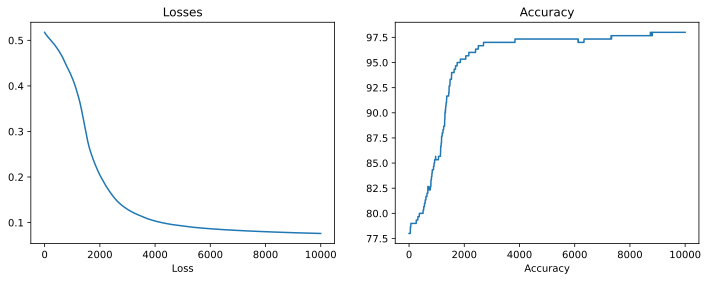

In [95]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses.detach())
ax[0].set_xlabel('Epochs')
ax[0].set_xlabel('Loss')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_xlabel('Epochs')
ax[1].set_xlabel('Accuracy')
ax[1].set_title('Accuracy')

plt.show()

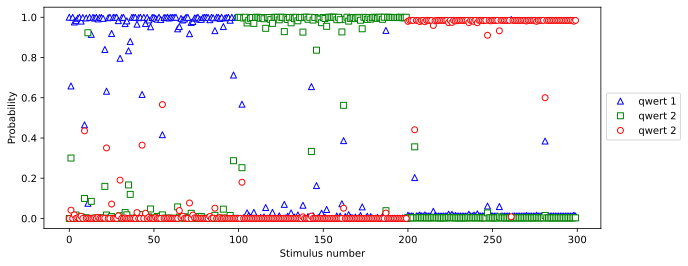

In [102]:
fig = plt.figure(figsize=(10,4))

colorshape = [  'b^','gs','ro' ]
sm = nn.Softmax(1)
predictions_sm = sm(predictions.detach())
for i in range(3):
  plt.plot(predictions_sm[:,i],colorshape[i],markerfacecolor='w')



plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1','qwert 2','qwert 2'],loc=(1.01,.4))
plt.show()